In [4]:
from typing import Iterable

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [11]:
def my_ode(x: float, y: np.array, epsilon: float) -> np.array:
    return np.array([y[1], (x**2 - epsilon)*y[0]])

In [76]:
epsilon = 9
y_initial_guess = np.array([.1, .1])
x = np.arange(-4, 4, 0.1)

sol = solve_ivp(
    fun=my_ode,
    t_span=(-4, 4),
    y0=y_initial_guess,
    method="RK45",
    args=(epsilon,),
    dense_output=True
)

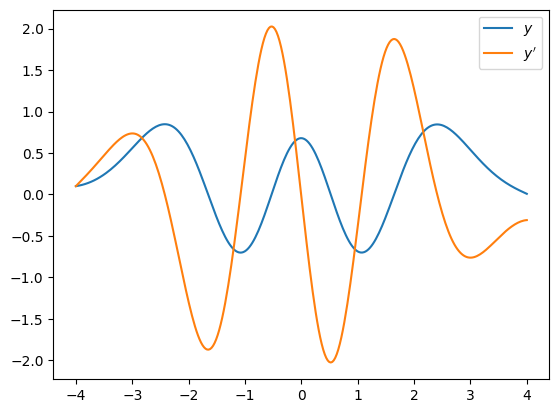

In [77]:
x_eval = np.linspace(-4, 4, 300)
plt.plot(x_eval, sol.sol(x_eval)[0, :], label=r"$y$")
plt.plot(x_eval, sol.sol(x_eval)[1, :], label=r"$y^{\prime}$")
plt.legend()
plt.show()

### ChatGPT Code to start with and continue experimenting

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import root
import matplotlib.pyplot as plt

# Define the second-order differential equation y''(x) = -lambda * y(x)
def ode_system(x, y, lambd):
    return [y[1], -lambd * y[0]]

# Solve IVP for a guessed lambda using solve_ivp (Shooting Method)
def solve_ivp_for_lambda(lambd, x_span, y0):
    sol = solve_ivp(ode_system, x_span, y0, args=(lambd,), t_eval=np.linspace(x_span[0], x_span[1], 1000))
    return sol

# Function to be zeroed (boundary condition at x = pi)
def boundary_condition(lambd):
    # Initial conditions: y(0) = 0, y'(0) = 1 (arbitrary non-zero value for shooting)
    y0 = [0, 1]
    x_span = [0, np.pi]
    
    # Solve the IVP
    sol = solve_ivp_for_lambda(lambd, x_span, y0)
    
    # We want y(pi) to be zero (boundary condition at x = pi)
    return sol.y[0, -1]

# Find the eigenvalues using the root-finding method
def find_eigenvalues(num_eigenvalues):
    eigenvalues = []
    eigenfunctions = []
    for n in range(1, num_eigenvalues + 1):
        # Make an initial guess for the eigenvalue (n^2 is a good estimate)
        initial_guess = (n * np.pi / np.pi)**2
        
        # Use scipy's root-finding method to find the correct eigenvalue
        sol = root(boundary_condition, initial_guess)
        
        if sol.success:
            eigenvalue = sol.x[0]
            eigenvalues.append(eigenvalue)
            
            # Solve again to get the eigenfunction for the found eigenvalue
            y0 = [0, 1]
            x_span = [0, np.pi]
            solution = solve_ivp_for_lambda(eigenvalue, x_span, y0)
            eigenfunctions.append(solution)
        else:
            print(f"Failed to find eigenvalue for n = {n}")
    
    return eigenvalues, eigenfunctions

# Plot the eigenfunctions
def plot_eigenfunctions(eigenfunctions):
    x = np.linspace(0, np.pi, 1000)
    plt.figure(figsize=(10, 6))
    
    for i, solution in enumerate(eigenfunctions):
        plt.plot(solution.t, solution.y[0], label=f'Eigenfunction {i+1}')
    
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.title('Eigenfunctions')
    plt.legend()
    plt.grid(True)
    plt.show()

# Find the first 5 eigenvalues and eigenfunctions
num_eigenvalues = 5
eigenvalues, eigenfunctions = find_eigenvalues(num_eigenvalues)

# Output the results
print("Eigenvalues:", eigenvalues)

# Plot the eigenfunctions
plot_eigenfunctions(eigenfunctions)


In [ ]:
# pseudo code
y(a) = \alpha
dy_dt = A_guess_current
for i in range(max_iter):
    # setup initial conditions based on initial guess for A

    # solve initial value problem
    sol = solver()
    # evaluate solution at boundary b
    \beta_star = sol.sol(b)
    if abs(\beta_star - \beta) < tol:
        break
    if \beta_star > \beta:
        A -= small_adjustment
    elif \beta_star < \beta:
        A += small_adjustment
    A_guess_current = A
    

### Example BVP to Initial Value problem for Shooting method

$y^{\prime\prime} + (x^2 - \sin x)y^\prime - \left(\cos^2 x\right)y = 5, \quad x \in [0, 1]$

$y(0) = 3$

$y^\prime(1) = 5$

These leads to the first order system of equations, where $y = y_0$ and $y^\prime = y_1$

$$
\left[
\begin{align*}
y_0 \\
y_1
\end{align*}
\right]^\prime = \left[
\begin{align*}
y_1 \\
5 - (x^2 - \sin x)y_1 + \left(\cos^2 x\right)y_0
\end{align*}
\right]
$$
and 
$$
y_0(0) = 3, \quad y_1(1) = 5
$$

In [15]:
epsilon_n_guess = np.array([.05])
L = 4
step_size = 0.1

In [16]:
def shoot_for_hw(
    x_value: np.array,
    phi_n: np.array,
    epsilon_n: float,
) -> np.array:
    """"Therefore"""
    return np.array(
        [
            phi_n[1],
            (x_value**2 - epsilon_n)*phi_n[0]
        ]
    )

def bvp_bc(phi_a, phi_b, epsilon_n):
    return np.array(
        [
            phi_a[1] - np.sqrt((-L)**2 - epsilon_n[0])*phi_a[0],
            phi_b[1] + np.sqrt((L)**2 - epsilon_n[0])*phi_b[0],
            0
        ]
    )


In [17]:
xrange = np.arange(
    -L,
    L,
    step=step_size
)
y_initial_guess = [np.sin(xrange), np.cos(xrange)]

sol = solve_bvp(
    fun=shoot_for_hw,
    bc=bvp_bc,
    x=xrange,
    y=y_initial_guess,
    p=epsilon_n_guess,
)
sol

       message: A singular Jacobian encountered when solving the collocation system.
       success: False
        status: 2
             x: [-4.000e+00 -3.900e+00 ...  3.800e+00  3.900e+00]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x11055bef0>
             p: [ 5.000e-02]
             y: [[ 7.568e-01  6.878e-01 ... -6.119e-01 -6.878e-01]
                 [-6.536e-01 -7.259e-01 ... -7.910e-01 -7.259e-01]]
            yp: [[-6.536e-01 -7.259e-01 ... -7.910e-01 -7.259e-01]
                 [ 1.207e+01  1.043e+01 ... -8.805e+00 -1.043e+01]]
 rms_residuals: [ 1.073e+00  1.062e+00 ...  1.046e+00  1.062e+00]
         niter: 1

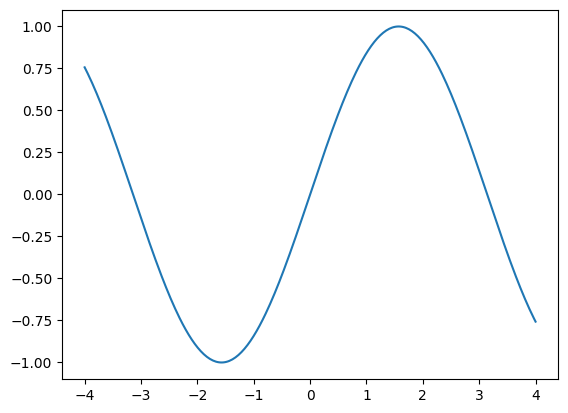

In [18]:
x_eval = np.linspace(-L, L, 300)

plt.plot(x_eval, sol.sol(x_eval)[0])
plt.show()

In [3]:
# The abdsolute value of the first 5 eigenfunctions, this should be (2,5)
A1 = None
# The corresponding first 5 eigenvalues, this should be (1,5)
A2 = None

In [19]:
def shoot2(
    x: np.array,
    xshoot: Iterable,
    n0: float,
    beta: float,
) -> np.array:
    """"this is a doc string"""
    return [x[1], (beta-n0)*x[0]]

In [20]:
xshoot = [-1, 1]
n0 = 100
beta = 50

x0 = np.array([0, 1])

y = odeint(
    shoot2,
    x0,
    xshoot,
    args=(n0, beta)
)

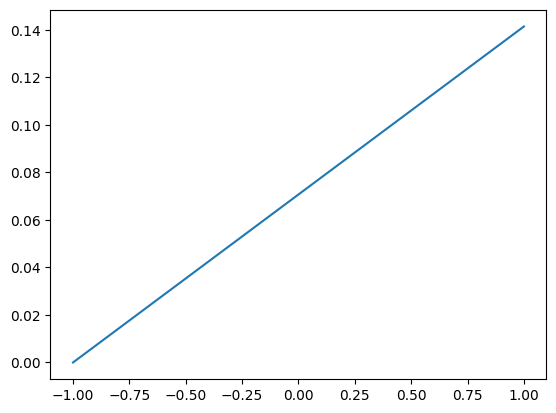

In [15]:
plt.plot(xshoot, y[:,0])
plt.show()

In [3]:
def bvpexam_rhs(
    y: np.array,
    x: float
) -> np.array:
    y_prime = [
        y[1],
        -(x**2 - np.sin(x))*y[1] + np.cos(x)**2*y[0] + 5
    ]
    return y_prime

In [4]:
xspan = [0, 1]
y_1_at_0 = 3
y_2_at_1 = 5

A = -3
dA = 0.5

for j in range(100):
    y0 = [3, A]
    x = np.linspace(xspan[0], xspan[1], 100)
    ysol = odeint(bvpexam_rhs, y0=y0, t=x)

    if np.abs(ysol[-1, 1] - y_2_at_1) < 1e-6:
        break

    if ysol[-1, 1]  < 5:
        A += dA
    else:
        A -= dA
        dA /= 2
    